# SC1015 Mini Project
<ol>
  <li>Dang Huy Phuong (U2120380G)</li>
  <li>Clara Heng (U2122795J)</li>
</ol>


# Content
<ol>
  <li>Problem and Objective</li>
  <li>Data Preparation and Cleaning</li>
  <li> Exploratory Data Analysis </li>
  <li>Supervised Method</li>
  <li>Unsupervised Method</li>
  <li>Outcomes and Insights </li>
</ol>

# 1. Problem and Objective
Based on the Formula 1 World Championship (1950 - 2023) dataset from Kaggle https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020 we aim to build model to predict:

Which driver will finish in the top position in the Driver’s Championship at the end of the season and which of the new drivers have the potential to become a top F1 driver?


# 2. Data Preparation and Cleaning

In this section, we aim to check for missing/uncompleted values, remove columns that are insignificant in predicting and engineer new feature

In [4]:
import pandas as pd
import numpy as np

#visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set()

from os import listdir
from os.path import isfile, join

## 2.1 Construting Master Dataframe

In this subsection, we build a master dataframe from various csv file (i.e. drivers.csv, results.csv, circuits.csv)

In [5]:
mypath = 'kaggle/input/formula-1-world-championship-1950-2020'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for file in onlyfiles:
    print(file) #names of the all datasets

pit_stops.csv
qualifying.csv
driver_standings.csv
sprint_results.csv
constructor_standings.csv
seasons.csv
results.csv
constructors.csv
circuits.csv
status.csv
races.csv
constructor_results.csv
drivers.csv


### 2.1.1 Read Files

In [6]:
drivers = pd.read_csv('kaggle/input/formula-1-world-championship-1950-2020/drivers.csv')
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [7]:
driver_result = pd.read_csv('kaggle/input/formula-1-world-championship-1950-2020/results.csv')
driver_result.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1.0
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1.0
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1.0
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1.0
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1.0


In [8]:
races = pd.read_csv('kaggle/input/formula-1-world-championship-1950-2020/races.csv')
races_date = races[['date', 'circuitId', 'raceId']]
races_date['date'] = pd.to_datetime(races_date['date'])

#Elimating Uncompleted data - Year 2023 and 2022
races_date = races_date[(races_date['date'].dt.year!=2023) & (races_date['date'].dt.year!=2022)]
races_date.head()

<ipython-input-8-bb7826bed3fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  races_date['date'] = pd.to_datetime(races_date['date'])


,date,circuitId,raceId
0,2009-03-29,1,1
1,2009-04-05,2,2
2,2009-04-19,17,3
3,2009-04-26,3,4
4,2009-05-10,4,5


In [9]:
circuits = pd.read_csv('kaggle/input/formula-1-world-championship-1950-2020/circuits.csv')
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [10]:
driver_standings = pd.read_csv('kaggle/input/formula-1-world-championship-1950-2020/driver_standings.csv')
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [11]:
laptimes = pd.read_csv('kaggle/input/formula-1-world-championship-1950-2020/lap_times.csv')
laptimes = laptimes[['raceId','driverId','lap','milliseconds']]
laptimes.head()

,raceId,driverId,lap,milliseconds
0,841,20,1,98109.0
1,841,20,2,93006.0
2,841,20,3,92713.0
3,841,20,4,92803.0
4,841,20,5,92342.0


In [12]:
qualifying = pd.read_csv('kaggle/input/formula-1-world-championship-1950-2020/qualifying.csv')
qualifying = qualifying[['driverId','position']]
qualifying.head()

,driverId,position
0,1,1
1,9,2
2,5,3
3,13,4
4,2,5


### 2.1.2 Merge Dataframes

In [13]:
df1 = pd.merge(driver_result, races, on ='raceId')
df_race= pd.merge(df1, drivers, on = 'driverId')
df_race

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,sprint_date,sprint_time,driverRef,number_y,code,forename,surname,dob,nationality,url_y
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,27,19,1,1,22,9,5,5,5,4.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,57,20,1,1,22,3,13,13,13,0.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,69,21,1,1,22,5,3,3,3,6.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,90,22,1,1,22,3,2,2,2,8.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17421,17408,719,440,176,12,13,\N,R,14,0.0,...,\N,\N,hall,\N,\N,Jim,Hall,1935-07-23,American,http://en.wikipedia.org/wiki/Jim_Hall_(race_ca...
17422,17414,719,436,176,16,0,\N,W,20,0.0,...,\N,\N,campbell-jones,\N,\N,John,Campbell-Jones,1930-01-21,British,http://en.wikipedia.org/wiki/John_Campbell-Jones
17423,17415,719,437,92,18,0,\N,W,21,0.0,...,\N,\N,burgess,\N,\N,Ian,Burgess,1930-07-06,British,http://en.wikipedia.org/wiki/Ian_Burgess
17424,17416,719,438,92,19,0,\N,W,22,0.0,...,\N,\N,settember,\N,\N,Tony,Settember,1926-07-10,American,http://en.wikipedia.org/wiki/Tony_Settember


In [14]:
#Drop posterior data column (time, milliseconds, fastestLap, fastestLapTime, fastestLapSpeed, statusId)
posterior_data = ['laps', 'milliseconds', 'fastestLap', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'time_x', 'time_y', 'positionOrder']
df_race = df_race.drop(columns=posterior_data)
df_race

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,points,rank,...,sprint_date,sprint_time,driverRef,number_y,code,forename,surname,dob,nationality,url_y
0,1,18,1,1,22,1,1,1,10.0,2,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,27,19,1,1,22,9,5,5,4.0,3,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,57,20,1,1,22,3,13,13,0.0,19,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,69,21,1,1,22,5,3,3,6.0,3,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,90,22,1,1,22,3,2,2,8.0,2,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17421,17408,719,440,176,12,13,\N,R,0.0,\N,...,\N,\N,hall,\N,\N,Jim,Hall,1935-07-23,American,http://en.wikipedia.org/wiki/Jim_Hall_(race_ca...
17422,17414,719,436,176,16,0,\N,W,0.0,\N,...,\N,\N,campbell-jones,\N,\N,John,Campbell-Jones,1930-01-21,British,http://en.wikipedia.org/wiki/John_Campbell-Jones
17423,17415,719,437,92,18,0,\N,W,0.0,\N,...,\N,\N,burgess,\N,\N,Ian,Burgess,1930-07-06,British,http://en.wikipedia.org/wiki/Ian_Burgess
17424,17416,719,438,92,19,0,\N,W,0.0,\N,...,\N,\N,settember,\N,\N,Tony,Settember,1926-07-10,American,http://en.wikipedia.org/wiki/Tony_Settember


In [15]:
#Drop redundant positon and positionText column
df_race = df_race.drop(columns=['position',  'positionText', 'number_x', 'sprint_date', 'sprint_time', 'driverRef', 'number_y', 'nationality', 'url_x', 'url_y', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'quali_date', 'quali_time', 'fp3_date', 'fp3_time', 'name'])
df_race

,resultId,raceId,driverId,constructorId,grid,points,rank,year,round,circuitId,date,code,forename,surname,dob
0,1,18,1,1,1,10.0,2,2008,1,1,2008-03-16,HAM,Lewis,Hamilton,1985-01-07
1,27,19,1,1,9,4.0,3,2008,2,2,2008-03-23,HAM,Lewis,Hamilton,1985-01-07
2,57,20,1,1,3,0.0,19,2008,3,3,2008-04-06,HAM,Lewis,Hamilton,1985-01-07
3,69,21,1,1,5,6.0,3,2008,4,4,2008-04-27,HAM,Lewis,Hamilton,1985-01-07
4,90,22,1,1,3,8.0,2,2008,5,5,2008-05-11,HAM,Lewis,Hamilton,1985-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17421,17408,719,440,176,13,0.0,\N,1963,1,6,1963-05-26,\N,Jim,Hall,1935-07-23
17422,17414,719,436,176,0,0.0,\N,1963,1,6,1963-05-26,\N,John,Campbell-Jones,1930-01-21
17423,17415,719,437,92,0,0.0,\N,1963,1,6,1963-05-26,\N,Ian,Burgess,1930-07-06
17424,17416,719,438,92,0,0.0,\N,1963,1,6,1963-05-26,\N,Tony,Settember,1926-07-10


### 2.1.3 Feature Engineer

#### Age

In [16]:
#Change data type from string to datetime
df_race['dob'] = pd.to_datetime(df_race['dob'])
df_race['date'] = pd.to_datetime(df_race['date'])

In [17]:
#Add age column to dataframe
dates = datetime.today()-df_race['dob']
age = dates.dt.days/365
df_race['age'] = round(age)
df_race.head()

,resultId,raceId,driverId,constructorId,grid,points,rank,year,round,circuitId,date,code,forename,surname,dob,age
0,1,18,1,1,1,10.0,2,2008,1,1,2008-03-16,HAM,Lewis,Hamilton,1985-01-07,38.0
1,27,19,1,1,9,4.0,3,2008,2,2,2008-03-23,HAM,Lewis,Hamilton,1985-01-07,38.0
2,57,20,1,1,3,0.0,19,2008,3,3,2008-04-06,HAM,Lewis,Hamilton,1985-01-07,38.0
3,69,21,1,1,5,6.0,3,2008,4,4,2008-04-27,HAM,Lewis,Hamilton,1985-01-07,38.0
4,90,22,1,1,3,8.0,2,2008,5,5,2008-05-11,HAM,Lewis,Hamilton,1985-01-07,38.0


#### winRate - Likelihood of winning a race

In [18]:
# INITIALISATION
df_driver = drivers.copy()
df_driver['totalWins'] = 0

race_dates = races[['raceId','date']]
# CLEANING AND ADDING

# adding dates to each race
driver_standings = driver_standings.merge(race_dates[['raceId', 'date']], how='left', on='raceId')

# Convert the "date" column to a datetime object
driver_standings['date'] = pd.to_datetime(driver_standings['date'])

# Create a new column 'year' to extract the year from the 'date' column
driver_standings['year'] = driver_standings['date'].dt.year
# driver_standings_csv.head()

# count the number of races each driver has driven in
num_races_per_driver = driver_standings.groupby('driverId')['raceId'].nunique()
num_races_per_driver_df = num_races_per_driver.reset_index()
num_races_per_driver_df = num_races_per_driver_df.rename(columns={'raceId': 'totalRaces'})
# num_races_per_driver_df.head()

# FINDING TOTAL WINS FOR EACH DRIVER
for index, row in df_driver.iterrows():
    driverId = row['driverId']

    # filtering out rows with ['driverId'] == driverId
    driver_standings_csv_driverId = driver_standings[driver_standings['driverId'] == driverId]

    # Group the dataframe by year and find the maximum date for each year
    latest_day_in_year = driver_standings_csv_driverId.groupby(driver_standings_csv_driverId['date'].dt.year)['date'].max()

    # Use the latest day in each year to filter the original dataframe
    filtered_dataframe = driver_standings_csv_driverId.loc[driver_standings_csv_driverId['date'].isin(latest_day_in_year)]

    total_wins = filtered_dataframe['wins'].sum()
    
    index = df_driver.index[df_driver['driverId'] == driverId].tolist()[0]
    df_driver.at[index, 'totalWins'] = total_wins


# adding dates to each race
df_driver = df_driver.merge(num_races_per_driver_df, how='left', on='driverId')

# calculate win rate and drop totalWins columns
df_driver['winRate'] = df_driver['totalWins'] / df_driver['totalRaces']
df_driver = df_driver.drop(['totalWins'], axis=1)
df_driver['dob'] = pd.to_datetime(df_driver['dob'])
df_driver['age'] = 2023 - df_driver['dob'].dt.year
    
# PRINT CURRENT DATASET    
df_driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,totalRaces,winRate,age
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.331190,38
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,194.0,0.000000,46
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,206.0,0.111650,38
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,361.0,0.088643,42
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,111.0,0.009009,42


 ####  fastestLapRate - Likelihood of winning fastest lap

In [19]:
# Group the dataframe by raceId and find the index of the row with the minimum milliseconds
idx = laptimes.groupby('raceId')['milliseconds'].idxmin()

# Use the index to select the rows with the minimum milliseconds for each raceId
df_min_milliseconds = laptimes.loc[idx]

# Sort the result by raceId
df_min_milliseconds.sort_values('raceId', inplace=True)

counts = pd.DataFrame(df_min_milliseconds['driverId'].value_counts())
counts.columns = ['totalFastestLaps']
counts['driverId'] = counts.index
counts.reset_index(drop=True, inplace=True)

# adding totalFastestLaps to df maindata_wnames
df_driver = df_driver.merge(counts, how='left', on='driverId')
df_driver = df_driver.fillna(0)

# calculate fastest lap rate and drop totalFastestLaps
df_driver['fastestLapRate'] = df_driver['totalFastestLaps'] / df_driver['totalRaces']
df_driver = df_driver.drop(['totalFastestLaps'], axis=1)

# PRINT CURRENT DATASET    
df_driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,totalRaces,winRate,age,fastestLapRate
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.331190,38,0.009646
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,194.0,0.000000,46,0.000000
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,206.0,0.111650,38,0.004854
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,361.0,0.088643,42,0.005540
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,111.0,0.009009,42,0.000000


 ####  qualifyingWinRate - Likelihood of winning qualifying

In [20]:
# COUNTING THE NUMBER OF QUALIFYING WINS
# Group by driverId and position, then count the number of occurrences
position_1_counts = qualifying[qualifying['position'] == 1].groupby('driverId')['position'].count().reset_index()

# Rename the 'position' column to 'position_1_count'
position_1_counts = position_1_counts.rename(columns={'position': 'position_1_count'})

# # Print the resulting DataFrame
# position_1_counts.head()

# merge
df_driver = df_driver.merge(position_1_counts, how='left', on='driverId')
df_driver = df_driver.fillna(0)

# calculate fastest lap rate and drop totalFastestLaps
df_driver['qualifyingWinRate'] = df_driver['position_1_count'] / df_driver['totalRaces']
df_driver = df_driver.drop(['position_1_count'], axis=1)

# filling in NaN values for qualifyingWinRate
df_driver.fillna(0, inplace=True)

df_driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,totalRaces,winRate,age,fastestLapRate,qualifyingWinRate
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.331190,38,0.009646,0.340836
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,194.0,0.000000,46,0.000000,0.005155
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,206.0,0.111650,38,0.004854,0.145631
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,361.0,0.088643,42,0.005540,0.063712
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,111.0,0.009009,42,0.000000,0.009009


# 3. Exploratory Data Analysis

In this section, we start to have first look in data and do some visualization to facilitate the analyzating process. It also help us to set up for machine learning model

In [21]:
#Number of data point
print("Number of data point for race dataframe: " + str(df_race.shape[0]))
print("Number of data point for driver dataframe: " + str(df_driver.shape[0]))

Number of data point for race dataframe: 17426
Number of data point for driver dataframe: 857


In [22]:
print("Data frame race information")
df_race.info()

print('\n\n')
print("Data frame driver information")
df_driver.info()

Data frame race information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17426 entries, 0 to 17425
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   resultId       17426 non-null  int64         
 1   raceId         17426 non-null  int64         
 2   driverId       17426 non-null  int64         
 3   constructorId  17426 non-null  int64         
 4   grid           17426 non-null  int64         
 5   points         17426 non-null  float64       
 6   rank           17425 non-null  object        
 7   year           17426 non-null  int64         
 8   round          17426 non-null  int64         
 9   circuitId      17426 non-null  int64         
 10  date           17426 non-null  datetime64[ns]
 11  code           17426 non-null  object        
 12  forename       17426 non-null  object        
 13  surname        17426 non-null  object        
 14  dob            17426 non-null  datetime64[

> There is no null value in dataframe

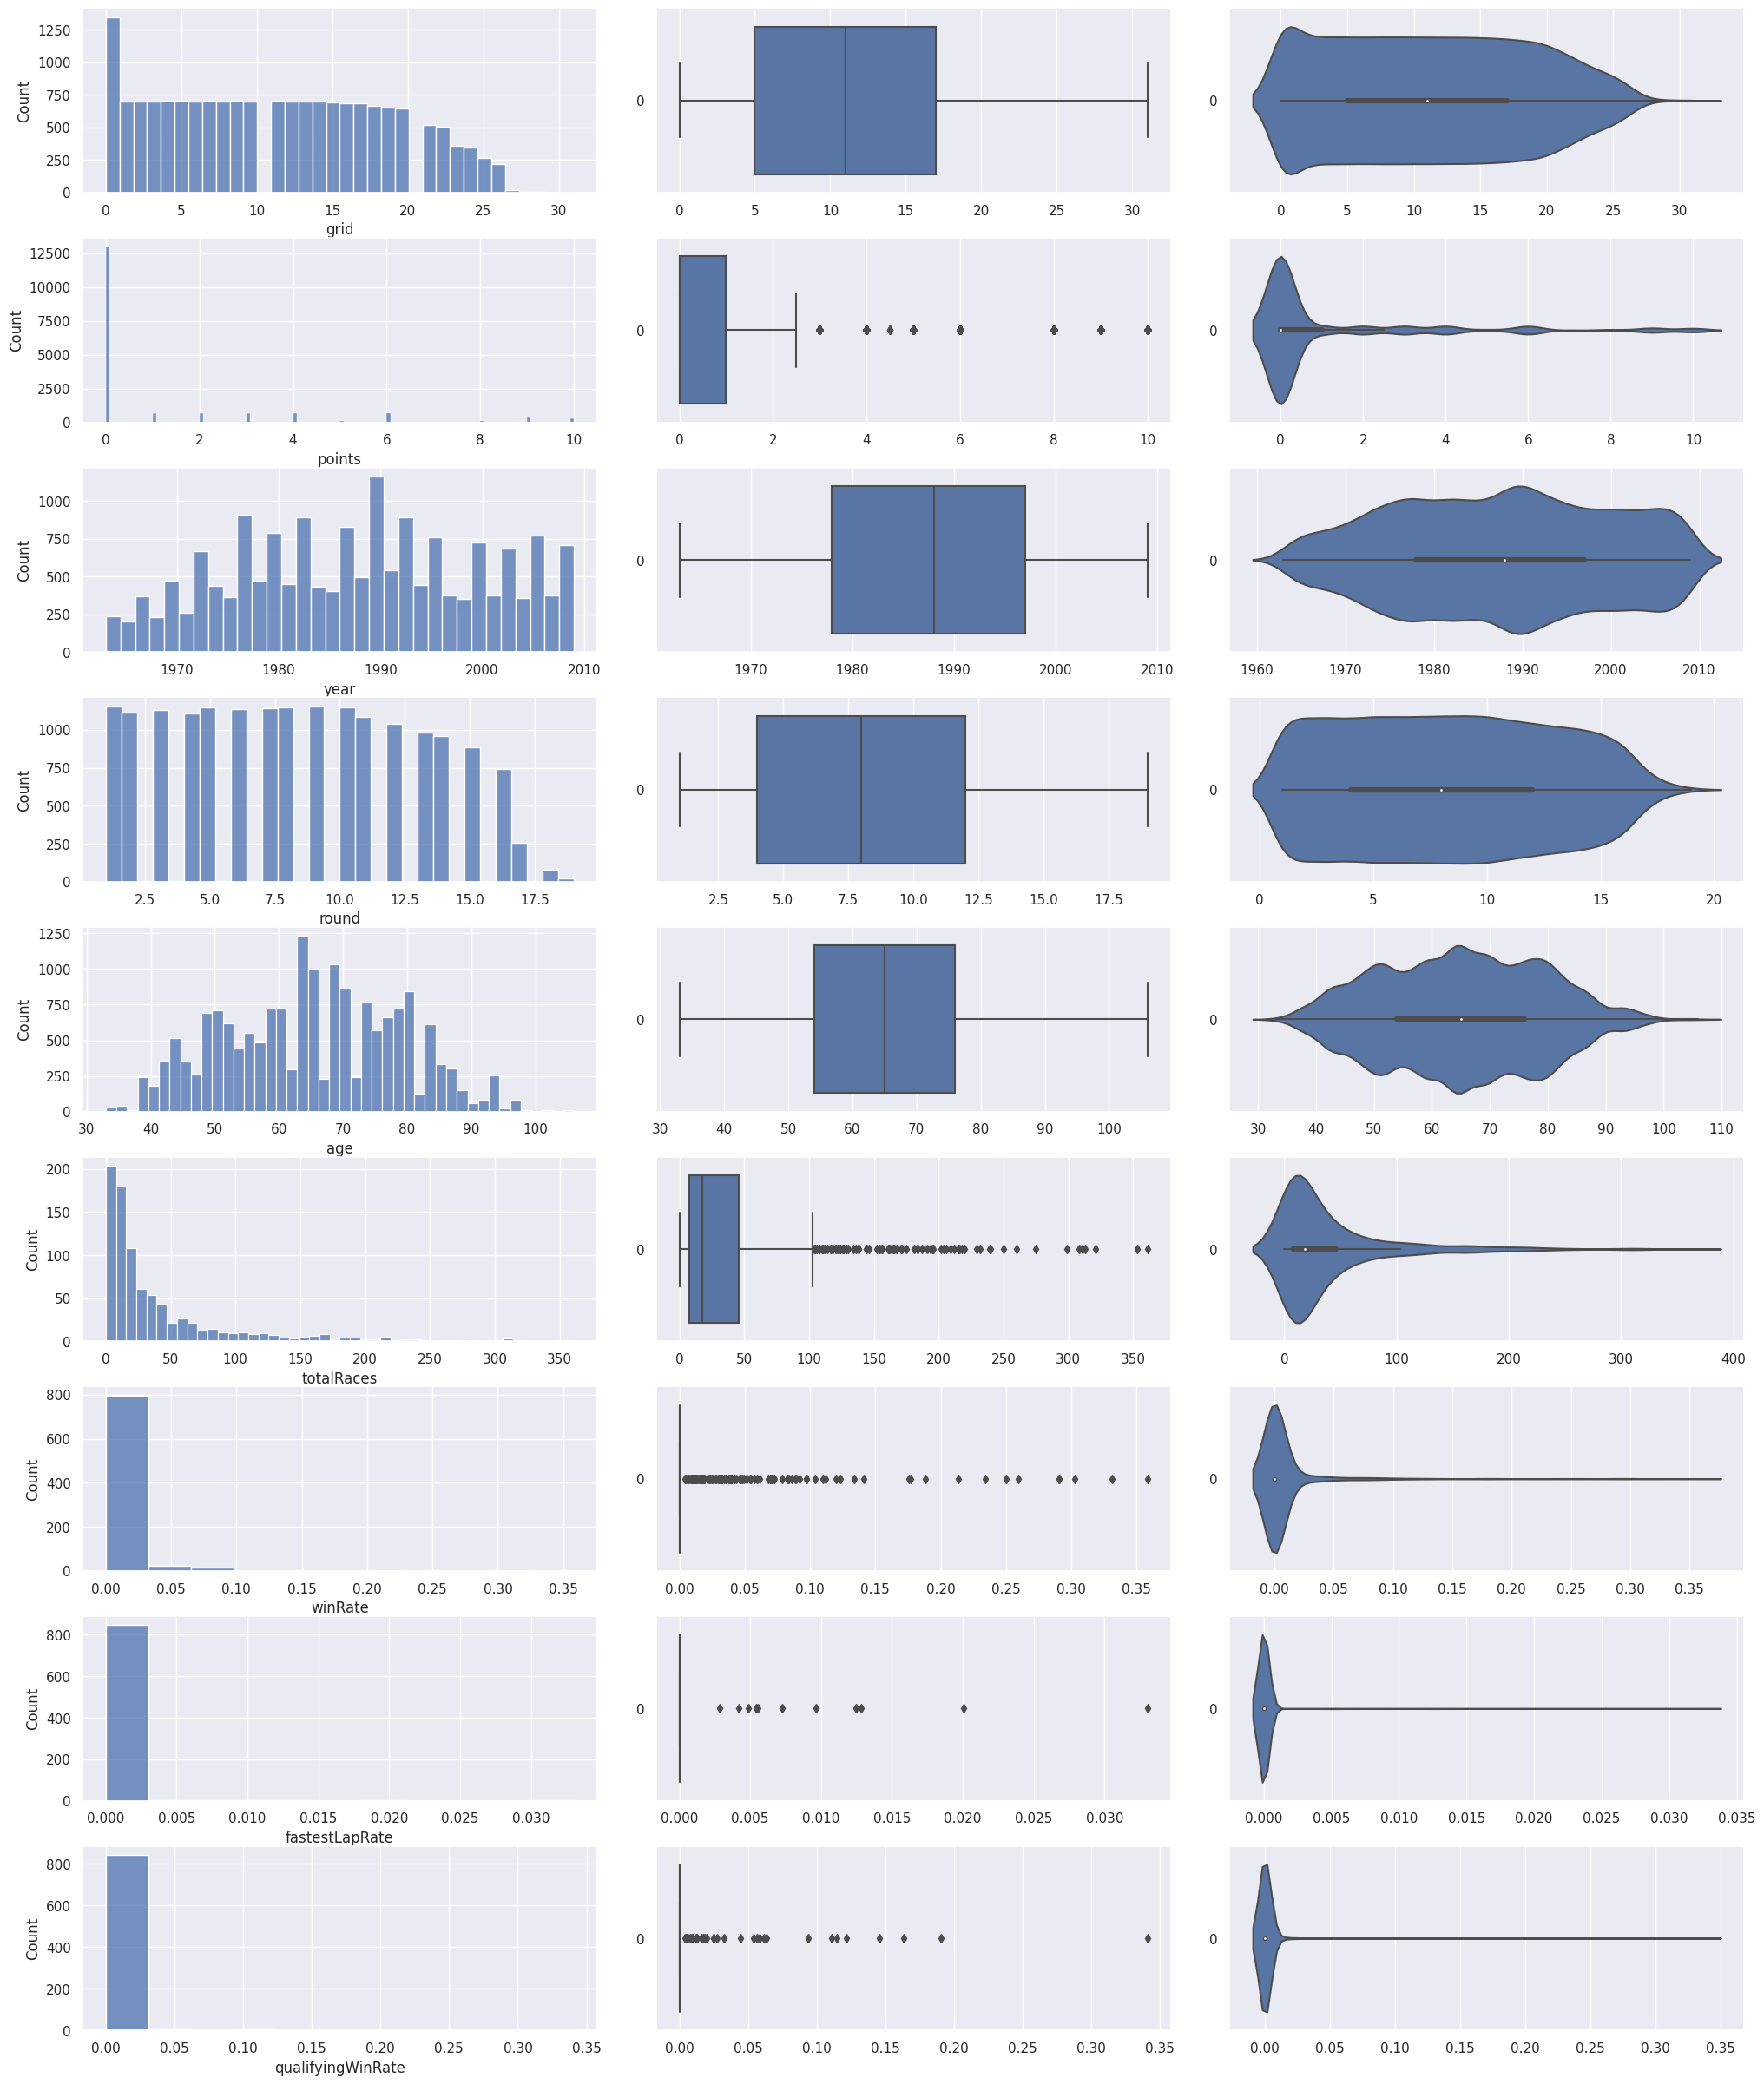

In [23]:
# plotting the distributions of the level variables
f, axes = plt.subplots(9, 3, figsize=(20, 24))

df_numeric = pd.DataFrame(df_race[['grid', 'points', 'year', 'round', 'age']])
# Format the layout so that no overlapping between titles and graphs
df_numeric_1 = pd.DataFrame(df_driver[['totalRaces', 'winRate', 'fastestLapRate', 'qualifyingWinRate']])
plt.tight_layout()
count = 0

for var in df_numeric:
    sns.histplot(data = df_numeric[var], ax = axes[count,0])
    sns.boxplot(data = df_numeric[var], orient = "h", ax = axes[count,1])
    sns.violinplot(data = df_numeric[var], orient = "h", ax = axes[count,2])
    count += 1
    
for var in df_numeric_1:
    sns.histplot(data = df_numeric_1[var], ax = axes[count,0])
    sns.boxplot(data = df_numeric_1[var], orient = "h", ax = axes[count,1])
    sns.violinplot(data = df_numeric_1[var], orient = "h", ax = axes[count,2])
    count += 1

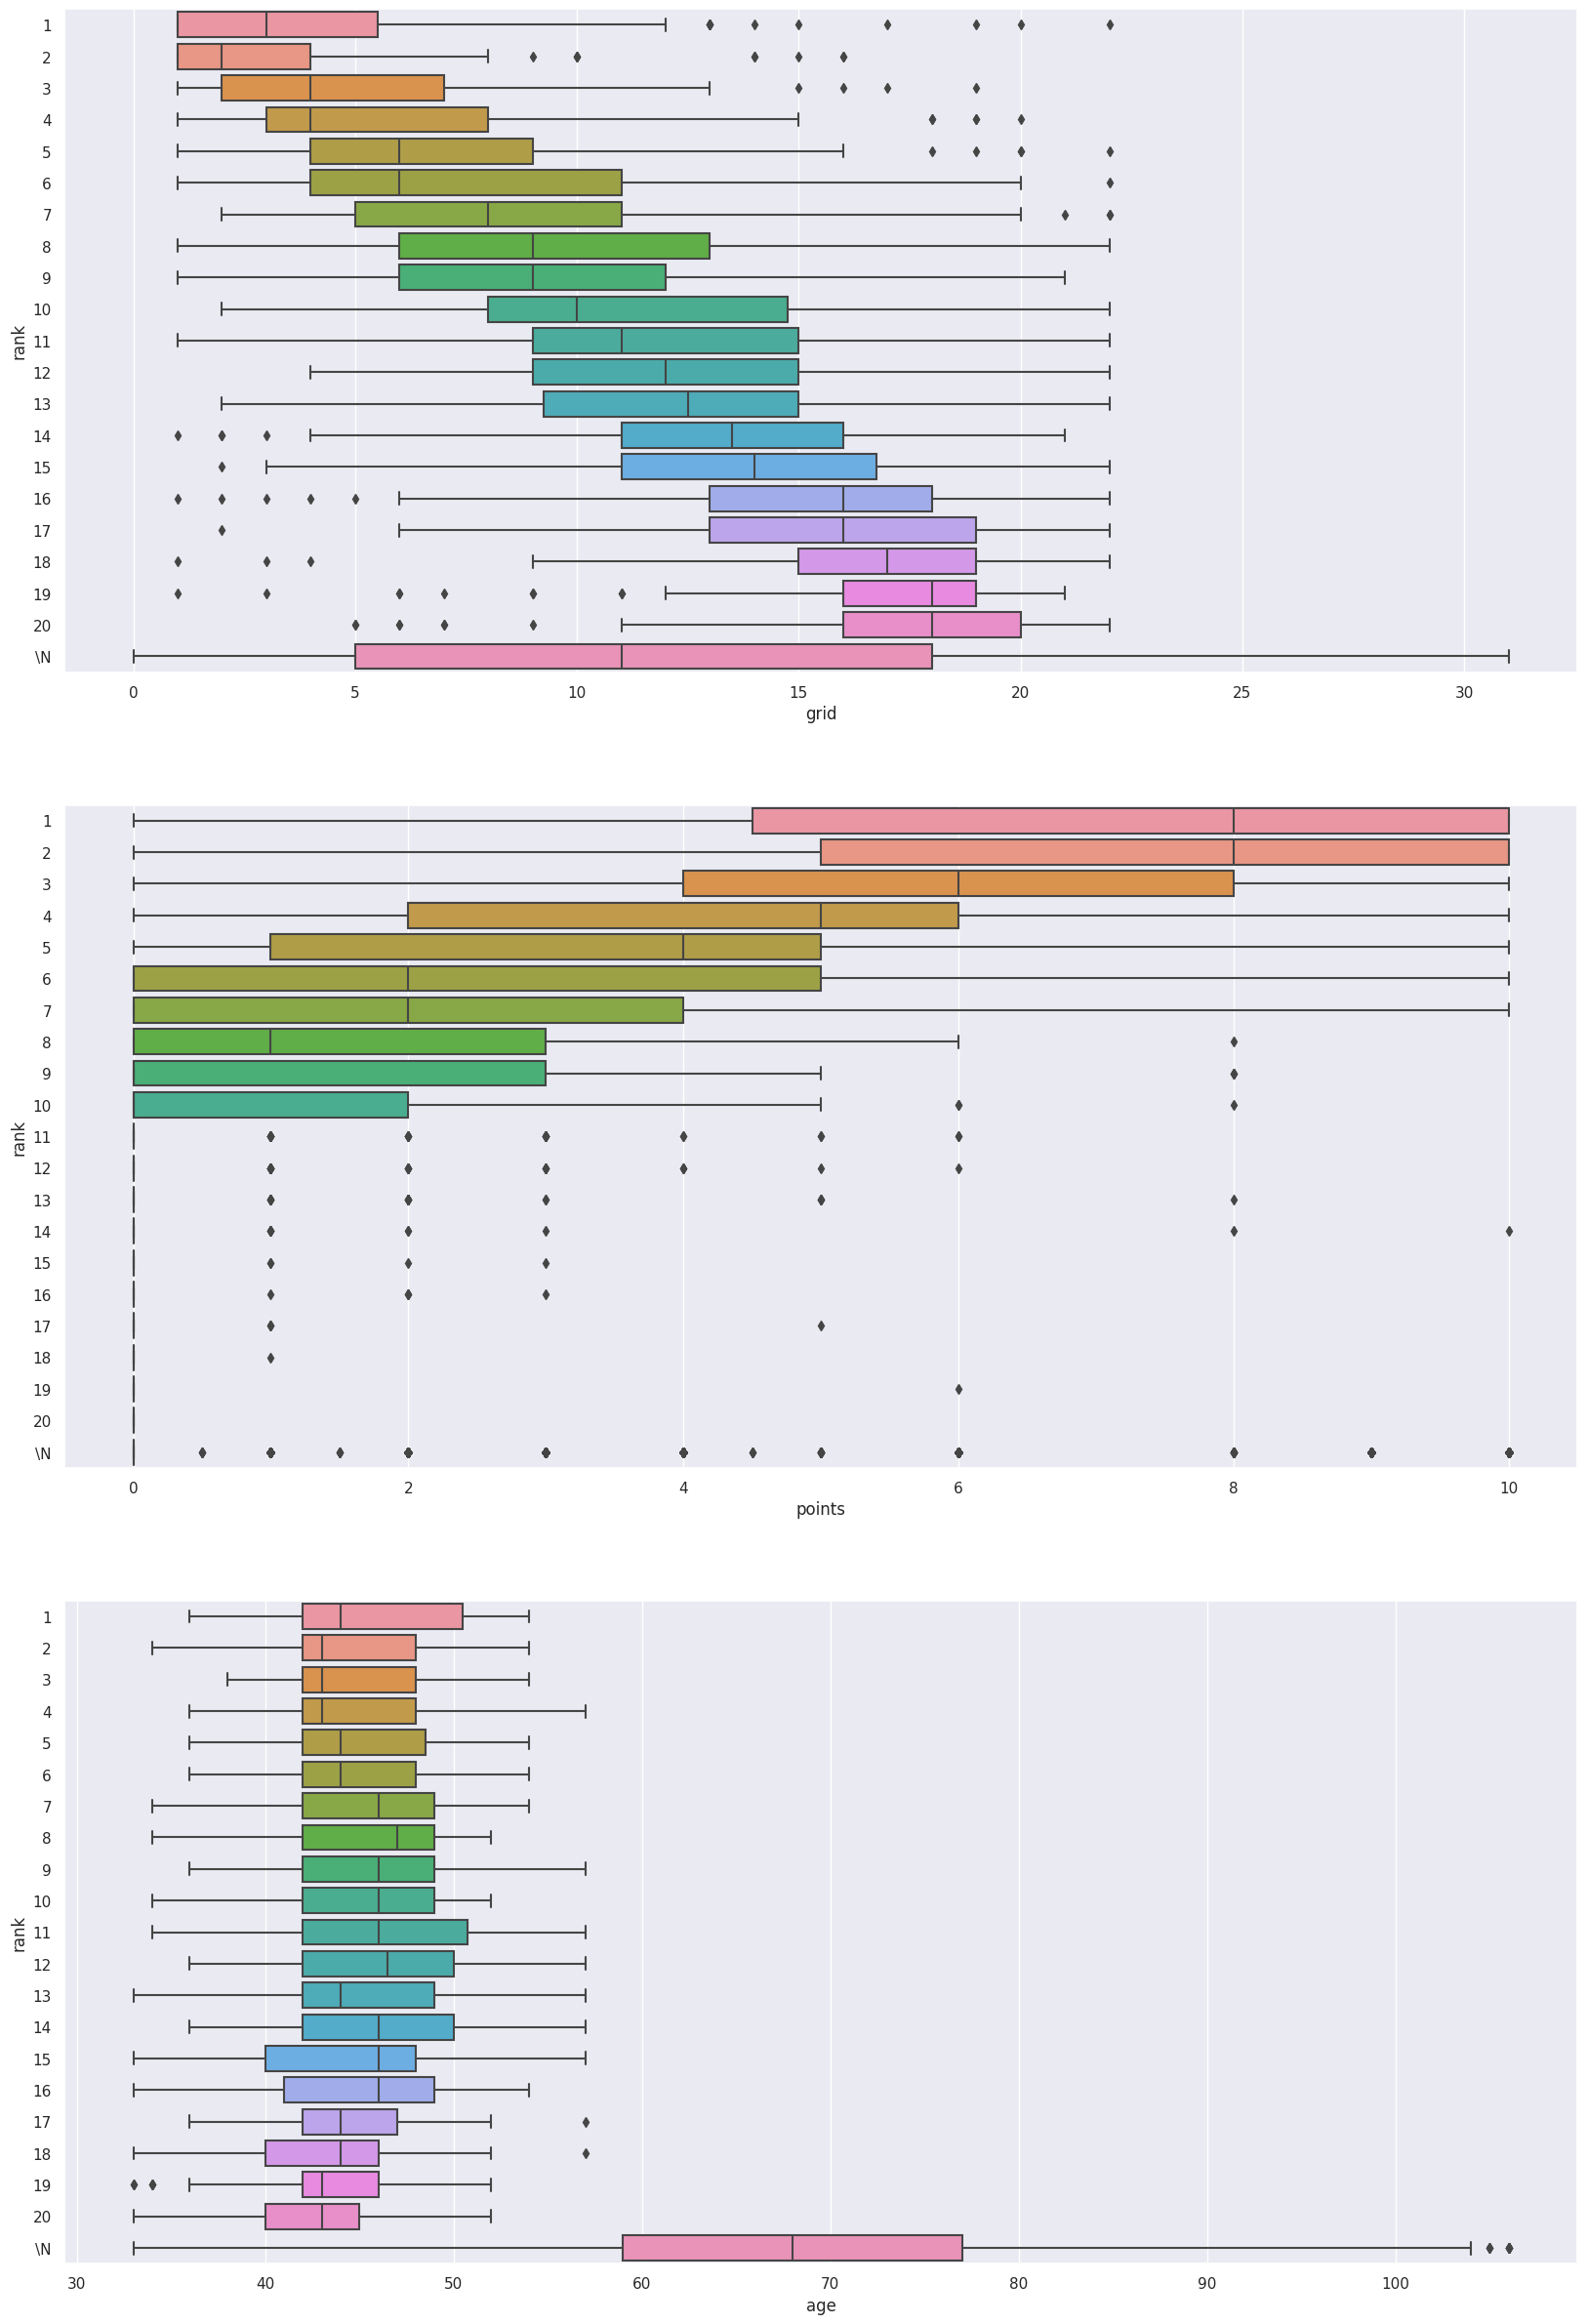

In [24]:
#Categorical Value
f, axes = plt.subplots(3, 1, figsize=(20, 30))
df_cat = pd.DataFrame(df_race[['grid', 'points', 'age', 'rank']])
count = 0
for col in df_cat:
    if col!='rank':
        sns.boxplot(data=df_race, x=col, y='rank', order=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17','18', '19', '20', '\\N'], ax=axes[count])
        count = count + 1

In [25]:
df_race.describe()

,resultId,raceId,driverId,constructorId,grid,points,year,round,circuitId,age
count,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000
mean,8713.500000,369.310341,140.729829,34.196545,11.230403,1.110467,1987.715597,8.303914,22.796396,65.151957
std,5030.597231,198.176773,102.992576,42.425486,7.410280,2.370041,12.097325,4.610502,16.397441,13.771073
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1963.000000,1.000000,1.000000,33.000000
25%,4357.250000,207.000000,55.000000,6.000000,5.000000,0.000000,1978.000000,4.000000,9.000000,54.000000
50%,8713.500000,378.000000,119.000000,24.000000,11.000000,0.000000,1988.000000,8.000000,19.000000,65.000000
75%,13069.750000,536.000000,206.000000,37.000000,17.000000,1.000000,1997.000000,12.000000,34.000000,76.000000
max,17426.000000,720.000000,440.000000,204.000000,31.000000,10.000000,2009.000000,19.000000,70.000000,106.000000


<ipython-input-26-6797a78c75f4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_race.corr(),annot=True)


<Axes: >

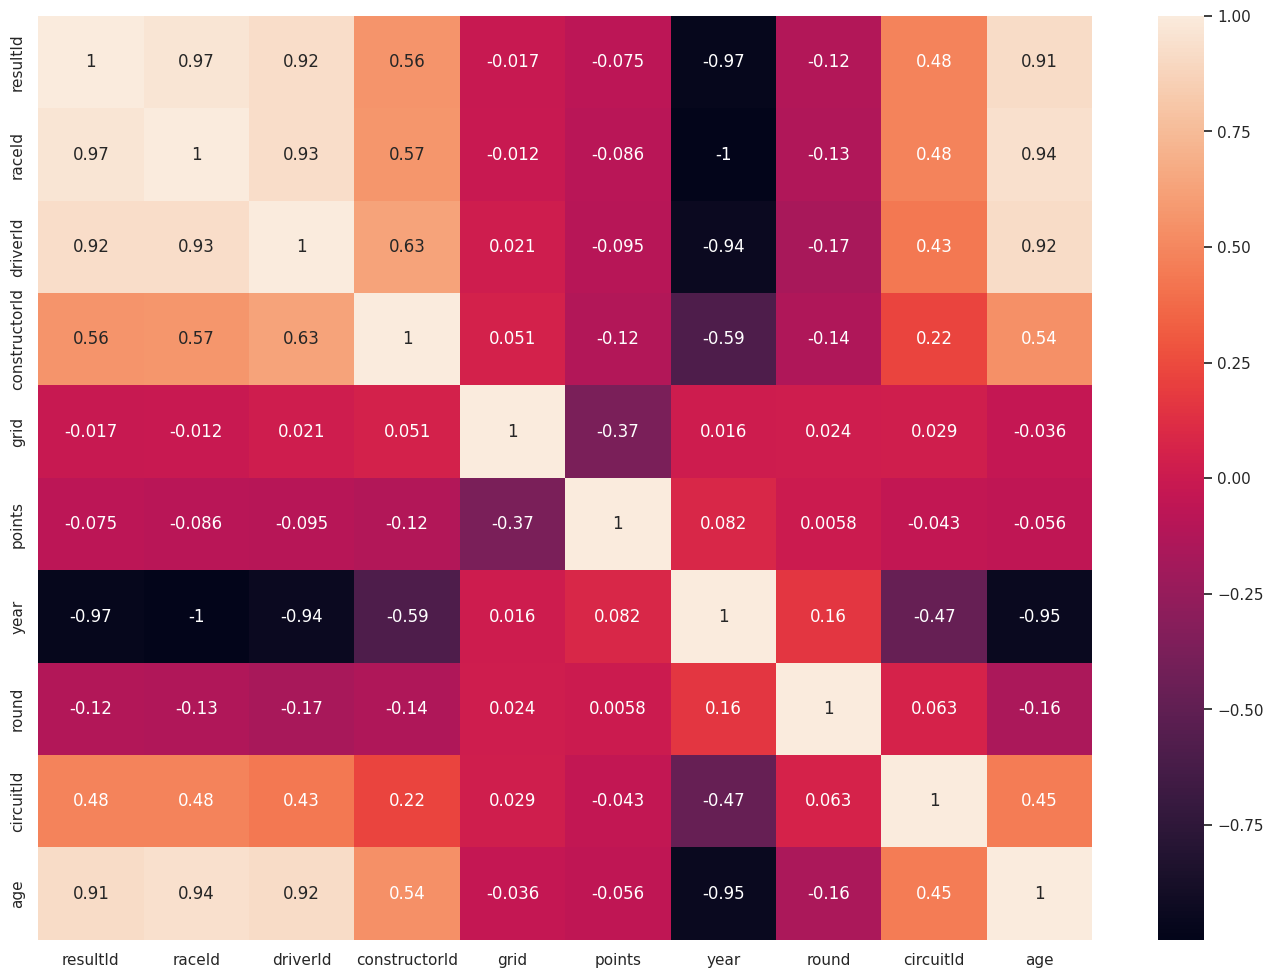

In [26]:
plt.figure(figsize=(17,12))
sns.heatmap(df_race.corr(),annot=True)

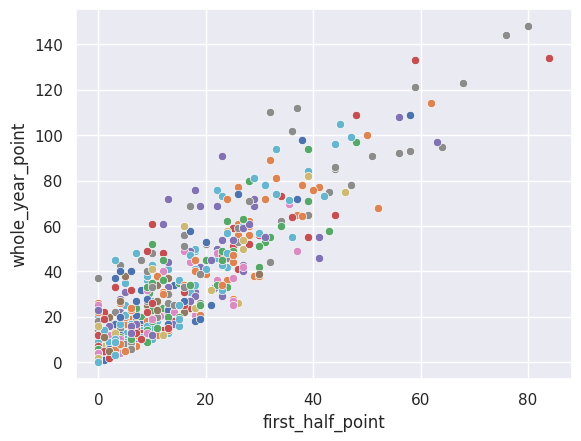

In [27]:
#Clasify race as the first half and second half by a new variable first_half
driver_result_withdate_divided = df_race.copy()
driver_result_withdate_divided['firstHalf'] = (driver_result_withdate_divided['date'].dt.month <= 6).astype(int)

driver_result_withdate_groupby_year_divided = driver_result_withdate_divided.groupby([driver_result_withdate_divided['date'].dt.year, driver_result_withdate_divided['firstHalf'], driver_result_withdate_divided['driverId']])
point_year_divided = driver_result_withdate_groupby_year_divided["points"].sum().unstack()

age_year = driver_result_withdate_groupby_year_divided["age"].mean().unstack()
age_year

#Loop through each team 
#Column name is ID of each team
point_first_half_all = []
whole_year_point_all = []
for column in point_year_divided:
    point_year_driver_divided = point_year_divided[column].unstack()
    point_first_half = []
    whole_year_point = []
    ages = []
    age_one_year = age_year[column].unstack()
    point_year_driver_divided = pd.merge(point_year_driver_divided, age_one_year, on='date')
    #Loop through each year
    for row in point_year_driver_divided.iterrows():
        if not np.isnan(row[1][0]) and not np.isnan(row[1][1]) and (not np.isnan(row[1][2]) or not np.isnan(row[1][3])):
            if not np.isnan(row[1][2]):
                age = row[1][2]
            else:
                age = row[1][3]
            ages.append(age)
            point_first_half.append(row[1][1])
            point_first_half_all.append((row[1][1], age))
            whole_year_point.append(row[1][0]+row[1][1])
            whole_year_point_all.append(row[1][0])
    new_df = pd.DataFrame({'first_half_point':point_first_half, 'ages': ages, 'whole_year_point':whole_year_point})
    sns.scatterplot(x='first_half_point', y='whole_year_point', data=new_df)

# 4. Supervised Method

In this step, we will use several predictive models to discover possible patterns in the dataset and make predictions based on them. From there, we would be a step closer in answering our first objective:
    <ul>
    <li>Which driver will finish in the top position in the Driver’s Championship at the end of the season based on their past performance and characteristics using supervised learning methods</li>
    </ul>
    
After doing EDA, we decide to use points as target variables to predict. From that, we can use points to decide which driver will finish in the top position. We seperate it into two tracks:
<ul> 
    <li>In first situation, we assume that we already known the first half of year performance of drivers. From that we predict overall season performance of drivers </li>
    <li>In second situation, we do not know about this season performance of drivers. From last year performance of drivers, we predict races performance of this year</li>  
</ul>
Note: Due to the raw and incomplete nature of the data, leading to significant instability, we have decided to predict the average of ten races for the upcoming year in the second scenario.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor

## 4.1 First Track

### 4.1.1 Linear Regression

In [29]:
#Split train and test set
train_x, test_x, train_y, test_y = train_test_split(pd.DataFrame(point_first_half_all), pd.DataFrame(whole_year_point_all), train_size=0.8)

In [30]:
#Train model
linreg = LinearRegression()
linreg.fit(train_x, train_y)

LinearRegression()

In [31]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

Intercept of Regression 	: b =  [3.05900808]
Coefficients of Regression 	: a =  [[ 0.84601562 -0.00952401]]



In [32]:
train_y_hat = linreg.predict(train_x)
test_y_hat = linreg.predict(test_x)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(train_x, train_y))
print("Mean Squared Error (MSE) \t:", mean_squared_error(train_y_hat, train_y))
#print("Root Mean Squared Error (MSE) \t:", np.sqrt(mean_squared_error(train_y_hat, train_y)))
#print()

# Check the Goodness of Fit and Prediction Accuracy (on Test Data)
print("Goodness of Fit of Model and Prediction Accuracy \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(test_x, test_y))
print("Mean Squared Error (MSE) \t:", mean_squared_error(test_y_hat, test_y))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5726420379366024
Mean Squared Error (MSE) 	: 73.09165998685212
Goodness of Fit of Model and Prediction Accuracy 	Test Dataset
Explained Variance (R^2) 	: 0.5869117351749428
Mean Squared Error (MSE) 	: 95.73585709865702


From the result, the linear regression model we developed provides a good fit for our data. The model was able to explain a significant proportion of the variance in the dependent variable using the independent variable. The coefficients for the independent variable were statistically significant, indicating a strong relationship between the two variables.

> We want to further improve the correctness of prediction by trying polynomial regression

### 4.1.2 Polynomial Regression 

In [33]:
#Split train and test set
train_x, test_x, train_y, test_y = train_test_split(pd.DataFrame(point_first_half_all), pd.DataFrame(whole_year_point_all), train_size=0.8)

In [34]:
polynomial_features= PolynomialFeatures(degree=2)
train_x_poly = polynomial_features.fit_transform(train_x)
test_x_poly = polynomial_features.fit_transform(test_x)

In [35]:
#Train model
polreg = LinearRegression()
polreg.fit(train_x_poly, train_y)

LinearRegression()

In [36]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', polreg.intercept_)
print('Coefficients of Regression \t: a = ', polreg.coef_)
print()

Intercept of Regression 	: b =  [2.24176012]
Coefficients of Regression 	: a =  [[ 0.00000000e+00  1.41622648e+00 -6.85503293e-02 -6.86700282e-03
  -4.06182648e-03  8.75878677e-04]]



In [37]:
train_y_hat = polreg.predict(train_x_poly)
test_y_hat = polreg.predict(test_x_poly)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy score\t:", polreg.score(train_x_poly, train_y))
print("Mean Squared Error (MSE) \t:", mean_squared_error(train_y_hat, train_y))
#print("Root Mean Squared Error (MSE) \t:", np.sqrt(mean_squared_error(train_y_hat, train_y)))
#print()

# Check the Goodness of Fit and Prediction Accuracy (on Test Data)
print("Goodness of Fit of Model and Prediction Accuracy \tTest Dataset")
print("Accuracy score \t:", polreg.score(test_x_poly, test_y))
print("Mean Squared Error (MSE) \t:", mean_squared_error(test_y_hat, test_y))

Goodness of Fit of Model 	Train Dataset
Accuracy score	: 0.58747410394858
Mean Squared Error (MSE) 	: 74.38149269432553
Goodness of Fit of Model and Prediction Accuracy 	Test Dataset
Accuracy score 	: 0.617731878052552
Mean Squared Error (MSE) 	: 74.69353851529583


> Compared to Linear Regression model, Polynomial Regression Model give a better fit on train set, but have a worse performance on validation set. From that observation, we can say that Polynomial Regression Model is overfitted. Linear Regression Model still give the best result

## 4.2 Second Track

In [38]:
driver_result_withdate_divided = driver_result_withdate_divided[driver_result_withdate_divided["points"]<=20]

In [39]:
driver_ids = driver_result_withdate_divided["driverId"].unique()

In [40]:
last_ten_race_results=[]
current_race_results=[]
for driver_id in driver_ids:
    temp_df = driver_result_withdate_divided[driver_result_withdate_divided["driverId"]==driver_id]
    temp_df = temp_df.sort_values('date')
    if(temp_df.shape[0]<=50):
        continue
    for i in range(51, temp_df.shape[0]):
        last_ten_race_results.append(temp_df.iloc[i-51:i-11]['points'].tolist()+temp_df.iloc[i-10:i]['age'].tolist()+temp_df.iloc[i-10:i]['round'].tolist()+temp_df.iloc[i-10:i]['grid'].tolist()+temp_df.iloc[i-10:i]['raceId'].tolist())
        current_race_results.append(temp_df.iloc[i-10:i]['points'].mean())

In [41]:
#Check x, y size
assert len(last_ten_race_results)==len(current_race_results)

In [42]:
#Split train and test set
train_x, test_x, train_y, test_y = train_test_split(last_ten_race_results, current_race_results, train_size=0.8)

In [43]:
#Train Model
mlp_regressor = MLPRegressor(hidden_layer_sizes=(30, 20, 30,10,20,40), max_iter=300)
mlp_regressor.fit(train_x, train_y)

MLPRegressor(hidden_layer_sizes=(30, 20, 30, 10, 20, 40), max_iter=300)

In [44]:
train_y_hat = mlp_regressor.predict(train_x)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy score \t:", mlp_regressor.score(train_x, train_y))
print("Mean Squared Error (MSE):", mean_squared_error(train_y_hat, train_y))
print()

# Check the Goodness of Fit and Prediction Accuracy (on Test Data)
print("Goodness of Fit of Model and Prediction Accuracy \tTest Dataset")
print("Accuracy score\t:", mlp_regressor.score(test_x, test_y))

Goodness of Fit of Model 	Train Dataset
Accuracy score 	: 0.777982490048409
Mean Squared Error (MSE): 0.7463254577930059

Goodness of Fit of Model and Prediction Accuracy 	Test Dataset
Accuracy score	: 0.7508003096826463


# 5. Unsupervised method

### Prepare test set

In [45]:
raceYears_df = races[['raceId','year']]
# find the highest raceId value (latest race)
max_race_id = driver_standings['raceId'].max()

# select all rows with the highest raceId value
currentDrivers = driver_standings[driver_standings['raceId'] == max_race_id]

# add years
currentDrivers = currentDrivers.merge(raceYears_df, how='left', on='raceId')

# add driverRefs
currentDrivers = currentDrivers.merge(drivers[['driverId','driverRef']], how='left', on='driverId')
# renaming & swapping columns
currentDrivers = currentDrivers.rename(columns={'year_x': 'latestRaceYear','raceId': 'latestraceId'})

# initialising new columns
currentDrivers['firstRaceId'] = 0
currentDrivers['firstRaceYear'] = 0

# swapping columns around
currentDrivers = currentDrivers[['driverRef', 'driverId', 'firstRaceId', 'firstRaceYear', 'latestraceId', 'latestRaceYear']]

In [46]:
# putting all active driver Ids in list driver_ids
driver_ids = currentDrivers['driverId']

In [47]:
for i in range(20):
    driver_standings_df_filtered = driver_standings[driver_standings['driverId'] == driver_ids[i]]
    min_race_id = driver_standings_df_filtered['raceId'].min()
    raceYears_df_filtered = raceYears_df[raceYears_df['raceId'] == min_race_id]
    min_race_year = raceYears_df_filtered.loc[raceYears_df_filtered['raceId'] == min_race_id, 'year'].iloc[0]
    currentDrivers.loc[currentDrivers['driverId'] == driver_ids[i], 'firstRaceId'] = min_race_id
    currentDrivers.loc[currentDrivers['driverId'] == driver_ids[i], 'firstRaceYear'] = min_race_year


In [48]:
currentDrivers['yearsRaced'] = currentDrivers['latestRaceYear'] - currentDrivers['firstRaceYear']
currentDrivers_sorted = currentDrivers.sort_values(by='yearsRaced', ascending=True)
currentDrivers_sorted

,driverRef,driverId,firstRaceId,firstRaceYear,latestraceId,latestRaceYear,yearsRaced
14,sargeant,858,1098,2023,1098,2023,0
11,piastri,857,1098,2023,1098,2023,0
19,zhou,855,1074,2022,1098,2023,1
18,de_vries,856,1089,2022,1098,2023,1
16,tsunoda,852,1051,2021,1098,2023,2
12,russell,847,1010,2019,1098,2023,4
8,norris,846,1010,2019,1098,2023,4
0,albon,848,1010,2019,1098,2023,4
6,leclerc,844,989,2018,1098,2023,5
3,gasly,842,983,2017,1098,2023,6


In [49]:
# calculate the number of rows that represent the bottom 30%
num_rows = int(len(currentDrivers_sorted) * 0.3)

# select the first N rows of the sorted DataFrame
bottom_30_percent = currentDrivers_sorted.head(num_rows)

# convert the driverId column of the selected rows to a list
newer_drivers = bottom_30_percent['driverId'].tolist()

# print the list of newer drivers
print(newer_drivers)

[858, 857, 855, 856, 852, 847]


### 5.1 Kmeans Clustering

In [50]:
maindata = df_driver[['driverId','driverRef','totalRaces','winRate','fastestLapRate','qualifyingWinRate','age']]
maindata.head()

,driverId,driverRef,totalRaces,winRate,fastestLapRate,qualifyingWinRate,age
0,1,hamilton,311.0,0.331190,0.009646,0.340836,38
1,2,heidfeld,194.0,0.000000,0.000000,0.005155,46
2,3,rosberg,206.0,0.111650,0.004854,0.145631,38
3,4,alonso,361.0,0.088643,0.005540,0.063712,42
4,5,kovalainen,111.0,0.009009,0.000000,0.009009,42


In [51]:
# creating newer drivers df
newer_drivers_df = maindata[maindata['driverId'].isin(newer_drivers)]
newer_drivers_df.head()

,driverId,driverRef,totalRaces,winRate,fastestLapRate,qualifyingWinRate,age
845,847,russell,83.0,0.012048,0.0,0.012048,25
850,852,tsunoda,45.0,0.000000,0.0,0.000000,23
853,855,zhou,23.0,0.000000,0.0,0.000000,24
854,856,de_vries,8.0,0.000000,0.0,0.000000,28
855,857,piastri,1.0,0.000000,0.0,0.000000,22


In [52]:
for index in newer_drivers:
#     print(index)
    maindata = maindata.drop(maindata[maindata['driverId'] == index].index)

maindata

,driverId,driverRef,totalRaces,winRate,fastestLapRate,qualifyingWinRate,age
0,1,hamilton,311.0,0.331190,0.009646,0.340836,38
1,2,heidfeld,194.0,0.000000,0.000000,0.005155,46
2,3,rosberg,206.0,0.111650,0.004854,0.145631,38
3,4,alonso,361.0,0.088643,0.005540,0.063712,42
4,5,kovalainen,111.0,0.009009,0.000000,0.009009,42
...,...,...,...,...,...,...,...
847,849,latifi,61.0,0.000000,0.000000,0.000000,28
848,850,pietro_fittipaldi,2.0,0.000000,0.000000,0.000000,27
849,851,aitken,2.0,0.000000,0.000000,0.000000,28
851,853,mazepin,22.0,0.000000,0.000000,0.000000,24


In [53]:
rawdata_kmeans = maindata.copy()
rawdata_kmeans = rawdata_kmeans[['winRate','fastestLapRate','qualifyingWinRate','age']]

rawdata_kmeans

,winRate,fastestLapRate,qualifyingWinRate,age
0,0.331190,0.009646,0.340836,38
1,0.000000,0.000000,0.005155,46
2,0.111650,0.004854,0.145631,38
3,0.088643,0.005540,0.063712,42
4,0.009009,0.000000,0.009009,42
...,...,...,...,...
847,0.000000,0.000000,0.000000,28
848,0.000000,0.000000,0.000000,27
849,0.000000,0.000000,0.000000,28
851,0.000000,0.000000,0.000000,24


In [54]:
# making newer_drivers_kmeans
newer_drivers_kmeans = newer_drivers_df[['winRate','fastestLapRate','qualifyingWinRate','age']]
newer_drivers_kmeans.head()

,winRate,fastestLapRate,qualifyingWinRate,age
845,0.012048,0.0,0.012048,25
850,0.000000,0.0,0.000000,23
853,0.000000,0.0,0.000000,24
854,0.000000,0.0,0.000000,28
855,0.000000,0.0,0.000000,22


## (checking for missing values)

why do we need to prepare data for clustering?
- variables may have incomparable units
- variables may have different scales and variances
- data in raw form may lead to bias in clustering
- clusters may be heavily dependent on one variable

how do we account for these issues?
- normalisation: rescaling 

In [55]:
# # Check for missing values
# print(np.isnan(rawdata_kmeans).any())

In [56]:
# # Check for infinite values
# print(np.isinf(rawdata_kmeans).any())

In [57]:
# Fit data to kmeans

# Normalising data
from sklearn.preprocessing import scale

# Apply z-score normalization to the dataset (rawdata_kmeans)
rawdata_kmeans_normalized = pd.DataFrame(scale(rawdata_kmeans), columns=rawdata_kmeans.columns)

# Apply z-score normalization to the dataset (newer_drivers_kmeans)
newer_drivers_kmeans_normalized = pd.DataFrame(scale(newer_drivers_kmeans), columns=newer_drivers_kmeans.columns)

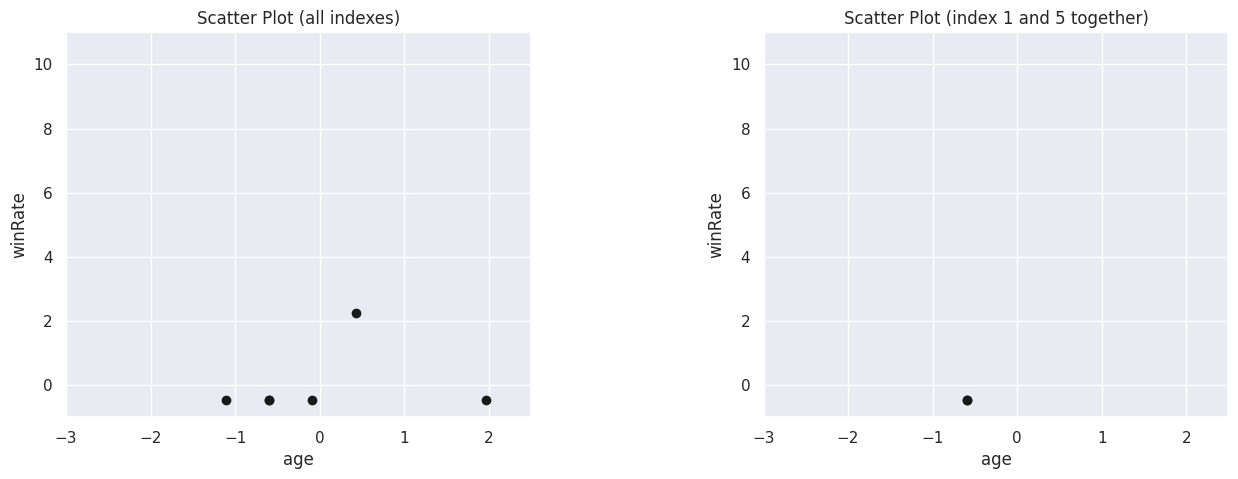

In [58]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Plot the first scatter plot on the first subplot
axs[0].scatter(newer_drivers_kmeans_normalized['age'], newer_drivers_kmeans_normalized['winRate'], color='k')
axs[0].set_title('Scatter Plot (all indexes)')
axs[0].set_xlabel('age')
axs[0].set_ylabel('winRate')
axs[0].set_xlim(-3, 2.5) # set x-axis limit
axs[0].set_ylim(-1, 11) # set y-axis limit


# Plot the second scatter plot on the second subplot: show that there are 6 points but index 1 and 5 look like one
axs[1].scatter(newer_drivers_kmeans_normalized['age'][1], newer_drivers_kmeans_normalized['winRate'][1], color='k')
axs[1].scatter(newer_drivers_kmeans_normalized['age'][5], newer_drivers_kmeans_normalized['winRate'][5], color='k')
axs[1].set_title('Scatter Plot (index 1 and 5 together)')
axs[1].set_xlabel('age')
axs[1].set_ylabel('winRate')
axs[1].set_xlim(-3, 2.5) # set x-axis limit
axs[1].set_ylim(-1, 11) # set y-axis limit

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

# show the plot
plt.show()

In [59]:
# Import the required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# edit the no. of desired clusters here
clusters = 5

# Choose the number of clusters you want to create:
kmeans = KMeans(n_clusters= clusters)

# Fit the model to your data:
kmeans.fit(rawdata_kmeans_normalized)

# Get the cluster labels for each data point:
label = kmeans.predict(rawdata_kmeans_normalized)

u_labels = np.unique(label)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


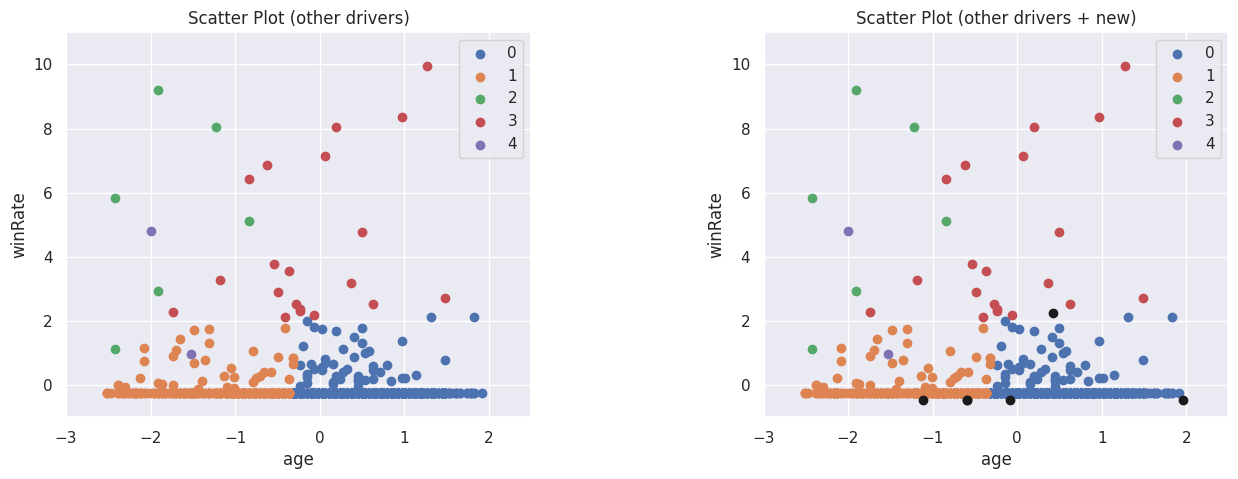

In [60]:
# Plotting the results (age against winRate)

# create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# plot first scatter plot in first subplot
for i in u_labels:
    axs[0].scatter(rawdata_kmeans_normalized.iloc[label == i , 3] , rawdata_kmeans_normalized.iloc[label == i , 0] , label = i)
axs[0].legend()
axs[0].set_title('Scatter Plot (other drivers)')
axs[0].set_xlabel('age')
axs[0].set_ylabel('winRate')
axs[0].set_xlim(-3, 2.5) # set x-axis limit
axs[0].set_ylim(-1, 11) # set y-axis limit

# plot second scatter plot in second subplot
for i in u_labels:
    axs[1].scatter(rawdata_kmeans_normalized.iloc[label == i , 3] , rawdata_kmeans_normalized.iloc[label == i , 0] , label = i)
axs[1].scatter(newer_drivers_kmeans_normalized['age'], newer_drivers_kmeans_normalized['winRate'], color='k')
axs[1].legend()
# axs[1].scatter(newer_drivers_kmeans_normalized['age'], newer_drivers_kmeans_normalized['winRate'], color='k')
axs[1].set_title('Scatter Plot (other drivers + new)')
axs[1].set_xlabel('age')
axs[1].set_ylabel('winRate')
axs[1].set_xlim(-3, 2.5) # set x-axis limit
axs[1].set_ylim(-1, 11) # set y-axis limit

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

# show the plot
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

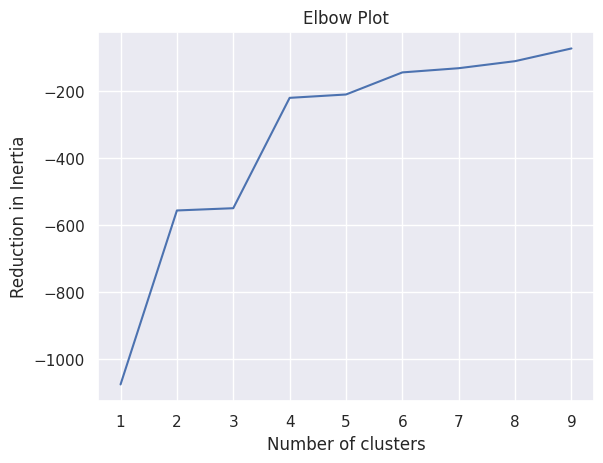

In [61]:
# FINDING THE BEST VALUE OF K (K = NUMBER OF GROUPS)

# Create a list to store inertias for different k values
inertias = []
inertia_reduction = []

# Loop over different k values and calculate the inertia for each
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(rawdata_kmeans_normalized)
    inertias.append(kmeans.inertia_)

print()
    
for i in range (1,10):
    diff = inertias[i] - inertias[i-1]
    inertia_reduction.append(diff)

# Visualize the elbow plot
plt.plot(range(1, 10), inertia_reduction)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in Inertia')
plt.show()


In [62]:
# Get the cluster labels for each driver
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
maindata['Kmeans_cluster'] = labels
maindata.head()

,driverId,driverRef,totalRaces,winRate,fastestLapRate,qualifyingWinRate,age,Kmeans_cluster
0,1,hamilton,311.0,0.331190,0.009646,0.340836,38,7
1,2,heidfeld,194.0,0.000000,0.000000,0.005155,46,0
2,3,rosberg,206.0,0.111650,0.004854,0.145631,38,2
3,4,alonso,361.0,0.088643,0.005540,0.063712,42,6
4,5,kovalainen,111.0,0.009009,0.000000,0.009009,42,0


In [63]:
# Analyze the clusters
cluster_counts = maindata['Kmeans_cluster'].value_counts()
print(cluster_counts)

# Get the average characteristics for each cluster
cluster_means = maindata.groupby('Kmeans_cluster').mean()

9    312
1    298
0    183
8     35
2      7
4      7
6      6
7      1
3      1
5      1
Name: Kmeans_cluster, dtype: int64


<ipython-input-63-50477eb7ca54>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = maindata.groupby('Kmeans_cluster').mean()


In [64]:
# Get the average characteristics for each cluster
cluster_means = maindata.groupby('Kmeans_cluster').mean()
cluster_means = cluster_means.reset_index()
cluster_means

<ipython-input-64-e1ed7e49aea5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = maindata.groupby('Kmeans_cluster').mean()


,Kmeans_cluster,driverId,totalRaces,winRate,fastestLapRate,qualifyingWinRate,age
0,0,259.601093,57.114754,0.001609,0.000023,0.001032,49.071038
1,1,339.265101,31.208054,0.001803,0.000000,0.000000,81.620805
2,2,379.571429,181.142857,0.146410,0.000693,0.116137,42.285714
3,3,17.000000,212.000000,0.042453,0.033019,0.056604,47.000000
4,4,374.428571,110.000000,0.267280,0.000000,0.002449,87.571429
5,5,20.000000,299.000000,0.177258,0.020067,0.190635,36.000000
6,6,58.666667,262.000000,0.039144,0.007727,0.033440,40.833333
7,7,1.000000,311.000000,0.331190,0.009646,0.340836,38.000000
8,8,306.828571,117.457143,0.072774,0.000000,0.003227,82.885714
9,9,633.211538,17.455128,0.000767,0.000000,0.000000,104.743590


In [65]:
# obtaining the cluster names of the top 2 clusters (by winRate)
#sort the cluster_means dataframe by winRate in descending order
sorted_cluster_means = cluster_means.sort_values('winRate', ascending=False)

# get the Kmeans_cluster value for the top 2 winRate values
top_clusters = sorted_cluster_means['Kmeans_cluster'].iloc[:2].tolist()

# print the top clusters
print(top_clusters)

[7, 4]


In [66]:
# select all rows in the Kmeans_clusters with the top 2 winRate average values
good_group = maindata.loc[(maindata['Kmeans_cluster'] == top_clusters[0]) | (maindata['Kmeans_cluster'] == top_clusters[1])]
good_group

,driverId,driverRef,totalRaces,winRate,fastestLapRate,qualifyingWinRate,age,Kmeans_cluster
0,1,hamilton,311.0,0.331190,0.009646,0.340836,38,7
101,102,senna,175.0,0.234286,0.000000,0.017143,63,4
116,117,prost,204.0,0.250000,0.000000,0.000000,68,4
327,328,stewart,104.0,0.259615,0.000000,0.000000,84,4
372,373,clark,86.0,0.290698,0.000000,0.000000,87,4
475,475,moss,91.0,0.175824,0.000000,0.000000,94,4
579,579,fangio,67.0,0.358209,0.000000,0.000000,112,4
647,647,ascari,43.0,0.302326,0.000000,0.000000,105,4


> We define a "top driver" as a driver who is found in the dataframe good_group.

### Which cluster would the new drivers be classified under?

In [67]:
# predict cluster labels for new datapoints
new_labels = kmeans.predict(newer_drivers_kmeans_normalized)

# create a new column in the original dataframe to store the predicted labels
newer_drivers_df['cluster'] = new_labels
newer_drivers_df

,driverId,driverRef,totalRaces,winRate,fastestLapRate,qualifyingWinRate,age,cluster
845,847,russell,83.0,0.012048,0.0,0.012048,25,8
850,852,tsunoda,45.0,0.000000,0.0,0.000000,23,1
853,855,zhou,23.0,0.000000,0.0,0.000000,24,1
854,856,de_vries,8.0,0.000000,0.0,0.000000,28,9
855,857,piastri,1.0,0.000000,0.0,0.000000,22,0
856,858,sargeant,1.0,0.000000,0.0,0.000000,23,1


In [68]:
# check if any values in 'newer_drivers_df['cluster']' appear in 'good_group['Kmeans_cluster']'
mask = newer_drivers_df['cluster'].isin(good_group['Kmeans_cluster'])

# filter 'newer_drivers_df' based on the mask
filtered_df = newer_drivers_df[mask]
filtered_df

,driverId,driverRef,totalRaces,winRate,fastestLapRate,qualifyingWinRate,age,cluster


> From here, we can see that none of the newer drivers share the same characteristics as the top drivers as they do not fall into the same clusters as them.

### 5.2 DBSCAN

In [69]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [70]:
# Normalize your data
X = StandardScaler().fit_transform(rawdata_kmeans)

In [71]:
# Perform DBSCAN clustering
db = DBSCAN().fit(X)

# Get the labels (cluster assignment) and the number of clusters
dbscan_labels = db.labels_
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

# Print the number of clusters
print('Estimated number of clusters: %d' % n_clusters_)

# Print the silhouette score if desired
silhouette_score = metrics.silhouette_score(X, dbscan_labels)
print("Silhouette Coefficient: %0.3f" % silhouette_score)

# Add the cluster labels to your original dataset
maindata['DBSCAN_cluster'] = dbscan_labels

maindata

Estimated number of clusters: 1
Silhouette Coefficient: 0.765


,driverId,driverRef,totalRaces,winRate,fastestLapRate,qualifyingWinRate,age,Kmeans_cluster,DBSCAN_cluster
0,1,hamilton,311.0,0.331190,0.009646,0.340836,38,7,-1
1,2,heidfeld,194.0,0.000000,0.000000,0.005155,46,0,0
2,3,rosberg,206.0,0.111650,0.004854,0.145631,38,2,-1
3,4,alonso,361.0,0.088643,0.005540,0.063712,42,6,-1
4,5,kovalainen,111.0,0.009009,0.000000,0.009009,42,0,0
...,...,...,...,...,...,...,...,...,...
847,849,latifi,61.0,0.000000,0.000000,0.000000,28,0,0
848,850,pietro_fittipaldi,2.0,0.000000,0.000000,0.000000,27,0,0
849,851,aitken,2.0,0.000000,0.000000,0.000000,28,0,0
851,853,mazepin,22.0,0.000000,0.000000,0.000000,24,0,0


The **Silhouette Coefficient** measures how well each data point in a clustering result is assigned to its own cluster compared to other clusters.
- Values range from -1 to 1, 1 indicating that a data point is well-matched to its own cluster and poorly matched to neighbouring clusters, with -1 indicating the opposite.
- 0 indicates that the data point is on the boundary between two clusters.

In [72]:
rawdata_kmeans_normalized

,winRate,fastestLapRate,qualifyingWinRate,age
0,9.188489,6.123740,18.997162,-1.910250
1,-0.244313,-0.089398,0.162593,-1.566394
2,2.935668,3.037279,8.044511,-1.910250
3,2.280369,3.478997,3.448152,-1.738322
4,0.012278,-0.089398,0.378856,-1.738322
...,...,...,...,...
846,-0.244313,-0.089398,-0.126626,-2.340070
847,-0.244313,-0.089398,-0.126626,-2.383052
848,-0.244313,-0.089398,-0.126626,-2.340070
849,-0.244313,-0.089398,-0.126626,-2.511998


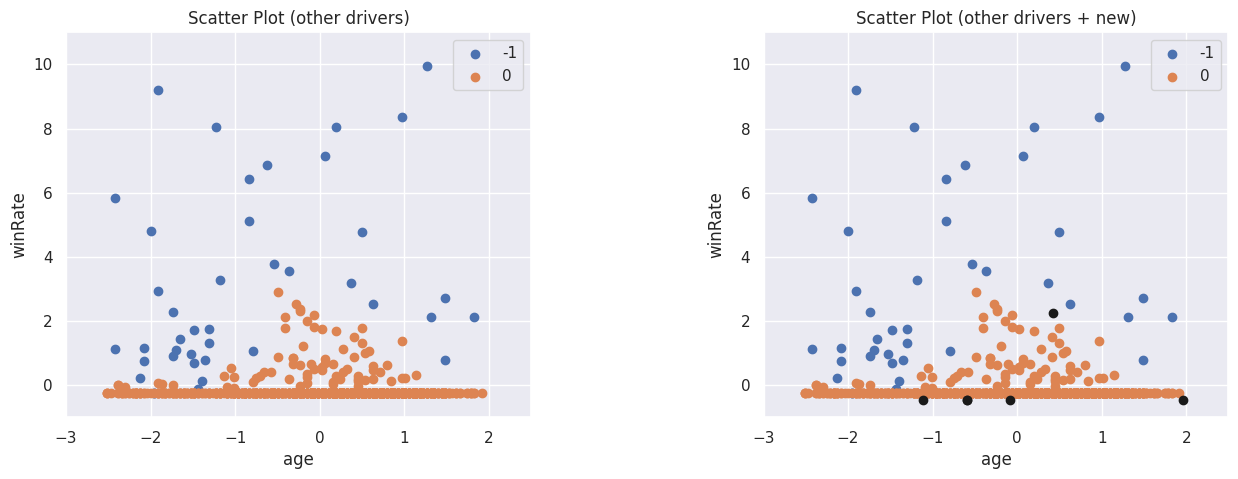

In [73]:
# Plotting the results (age against winRate)

u_labels_dbscan = np.unique(dbscan_labels)

# create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# plot first scatter plot in first subplot
for i in u_labels_dbscan:
#     print(i)
    axs[0].scatter(rawdata_kmeans_normalized.iloc[dbscan_labels == i , 3] , rawdata_kmeans_normalized.iloc[dbscan_labels == i , 0] , label = i)
axs[0].legend()
axs[0].set_title('Scatter Plot (other drivers)')
axs[0].set_xlabel('age')
axs[0].set_ylabel('winRate')
axs[0].set_xlim(-3, 2.5) # set x-axis limit
axs[0].set_ylim(-1, 11) # set y-axis limit

# plot second scatter plot in second subplot
for i in u_labels_dbscan:
    axs[1].scatter(rawdata_kmeans_normalized.iloc[dbscan_labels == i , 3] , rawdata_kmeans_normalized.iloc[dbscan_labels == i , 0] , label = i)
axs[1].scatter(newer_drivers_kmeans_normalized['age'], newer_drivers_kmeans_normalized['winRate'], color='k')
axs[1].legend()
axs[1].set_title('Scatter Plot (other drivers + new)')
axs[1].set_xlabel('age')
axs[1].set_ylabel('winRate')
axs[1].set_xlim(-3, 2.5) # set x-axis limit
axs[1].set_ylim(-1, 11) # set y-axis limit

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

# show the plot
plt.show()

In [74]:
# Get the average characteristics for each cluster
cluster_means = maindata.groupby('DBSCAN_cluster').mean()
cluster_means = cluster_means.reset_index()
cluster_means = cluster_means[['DBSCAN_cluster','driverId','winRate','fastestLapRate','qualifyingWinRate','age']]
cluster_means

<ipython-input-74-4c1afa9f4c6a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = maindata.groupby('DBSCAN_cluster').mean()


,DBSCAN_cluster,driverId,winRate,fastestLapRate,qualifyingWinRate,age
0,-1,280.121951,0.118483,0.002881,0.044937,62.439024
1,0,433.446914,0.003015,0.000000,0.000096,83.455556


In [75]:
# obtaining the cluster names of the top 2 clusters (by winRate)
#sort the cluster_means dataframe by winRate in descending order
sorted_cluster_means = cluster_means.sort_values('winRate', ascending=False)

# get the Kmeans_cluster value for the top 2 winRate values
top_cluster = sorted_cluster_means['DBSCAN_cluster'].iloc[:1].tolist()

# print the top clusters
print(top_cluster)

[-1]


In [76]:
# select all rows in the DBSCAN_cluster with the top winRate average values
good_group = maindata.loc[(maindata['DBSCAN_cluster'] == top_cluster[0])]
good_group = good_group[['DBSCAN_cluster','driverId','winRate','fastestLapRate','qualifyingWinRate','age']]
good_group.head()

,DBSCAN_cluster,driverId,winRate,fastestLapRate,qualifyingWinRate,age
0,-1,1,0.331190,0.009646,0.340836,38
2,-1,3,0.111650,0.004854,0.145631,38
3,-1,4,0.088643,0.005540,0.063712,42
7,-1,8,0.059490,0.002833,0.053824,44
12,-1,13,0.040000,0.007273,0.058182,42


> Thus, we define a "top driver" as a driver who is found in the dataframe good_group.

## Which cluster would the new drivers be classified under?

In [77]:
# predict the clusters for the new data points
labels = db.fit_predict(newer_drivers_kmeans_normalized)

# print the predicted cluster labels
print(labels)

[-1 -1 -1 -1 -1 -1]


In [78]:
# create a new column in the original dataframe to store the predicted labels
newer_drivers_df['cluster_dbscan'] = labels
newer_drivers_df

,driverId,driverRef,totalRaces,winRate,fastestLapRate,qualifyingWinRate,age,cluster,cluster_dbscan
845,847,russell,83.0,0.012048,0.0,0.012048,25,8,-1
850,852,tsunoda,45.0,0.000000,0.0,0.000000,23,1,-1
853,855,zhou,23.0,0.000000,0.0,0.000000,24,1,-1
854,856,de_vries,8.0,0.000000,0.0,0.000000,28,9,-1
855,857,piastri,1.0,0.000000,0.0,0.000000,22,0,-1
856,858,sargeant,1.0,0.000000,0.0,0.000000,23,1,-1


In [79]:
# check if any values in 'newer_drivers_df['cluster']' appear in 'good_group['DBSCAN_cluster']'
mask = newer_drivers_df['cluster_dbscan'].isin(good_group['DBSCAN_cluster'])

# filter 'newer_drivers_df' based on the mask
filtered_df = newer_drivers_df[mask]
filtered_df

,driverId,driverRef,totalRaces,winRate,fastestLapRate,qualifyingWinRate,age,cluster,cluster_dbscan
845,847,russell,83.0,0.012048,0.0,0.012048,25,8,-1
850,852,tsunoda,45.0,0.000000,0.0,0.000000,23,1,-1
853,855,zhou,23.0,0.000000,0.0,0.000000,24,1,-1
854,856,de_vries,8.0,0.000000,0.0,0.000000,28,9,-1
855,857,piastri,1.0,0.000000,0.0,0.000000,22,0,-1
856,858,sargeant,1.0,0.000000,0.0,0.000000,23,1,-1


> From here, we can see that according to DBSCAN, all of the newer drivers share the same characteristics as the top drivers.

# 6. Outcomes and Insights

## Outcome for Supervised Learning
* Due to the high model accuracy obtained, we can confidently use our model to predict Which driver will finish in the top position in the Driver’s Championship at the end of the season based on their past performance.
* This information might be helpful for teams to predict their drivers’ performance ahead of time, allowing them to plan ahead for their future driver lineups to maximise their success.

## Outcome for Unsupervised Learning
Using K-means and DBSCAN clustering, we produced 2 models to cluster our drivers. They predicted different clusters, and we could owe it to the difference in their algorithms.
* K-means clustering is not ideal for categorical data, as it assumes continuous data, in which k-modes clustering could be used instead.
* Different clustering algorithms have different strengths. DBSCAN is density-based and can find clusters of any shape, while K-means is centroid-based and requires specifying the number of clusters.
* After predicting which cluster our newer drivers would be, it was interesting to see that while K means predicted that none of the newer drivers shares the same characteristics as top drivers, DBSCAN does.
* However, F1 drivers vary in so many traits that we feel like the spread of each cluster was too big and it encompassed too many different demographics of drivers, thus it might not be accurate to say that they all have the potential to become successful drivers.

## Data-driven Insights
* Based on the correlation matrix, the points obtained by the driver are highly correlated to the age and grid of the driver, 0.25 and 0.37, respectively.
* Based on the DBSCAN clustering model,  the average age of the top cluster was 59. When compared to the other cluster’s 84, it may show that younger drivers are more likely to win more often than older drivers.
* Highlight to teams: focus on the potential of younger drivers and placing well in qualifying races.

## Main learning points
* Polynomial regression could result in a better fit on the training set, but it risks worse performance on the validation set
* It is very important to prepare data properly for clustering
* Learnt more about the different types of clustering models and their algorithms

## Recommendations
* More complex models can be integrated to improve performance of prediction such as Recurrent Neural Network to better capture time series data.
* In the future, more types of clustering could be used, such as hierarchical clustering
* More data could be fed into the clustering algorithm, when appropriate